Model Performance Evaluation

Training Data Evaluation:
Confusion Matrix:
[[  7   0   0   0   0   0   0   0]
 [  0 410   4   1   0   0   0   0]
 [  0   8 291   2   0   0   0   0]
 [  0   2   2 154   0   0   0   0]
 [  0   0   0   0  29   0   0   0]
 [  0   0   0   0   0  21   0   0]
 [  0   0   0   0   0   1  37   0]
 [  0   0   0   0   0   0   0  16]]
Precision: 0.98
Recall: 0.98
F1-Score: 0.98

Test Data Evaluation:
Confusion Matrix:
[[ 1  2  0  0  0  0  0  0]
 [ 0 78 14  7  0  0  0  0]
 [ 0 15 52  7  0  0  0  0]
 [ 0 11 16  3  3  2  0  0]
 [ 0  1  1  3  0  4  0  0]
 [ 0  0  0  2  3  0  1  0]
 [ 0  0  2  3  0  2  6  0]
 [ 0  0  3  2  0  0  1  2]]
Precision: 0.57
Recall: 0.57
F1-Score: 0.56
MSE: 516.9767014663332, RMSE: 22.737121661862417, MAPE: 7.603786087325575, R2: 0.9604924282443636


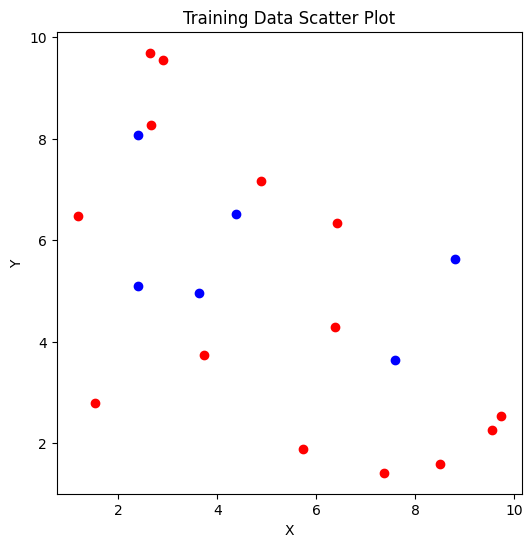

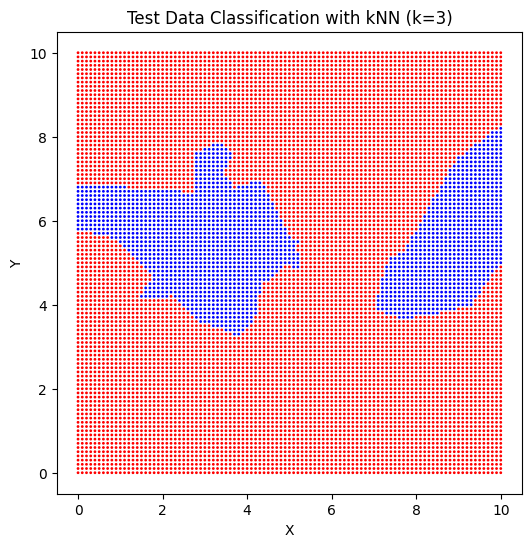

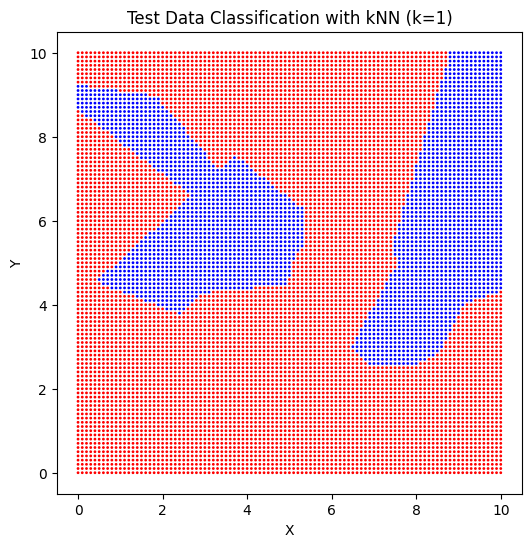

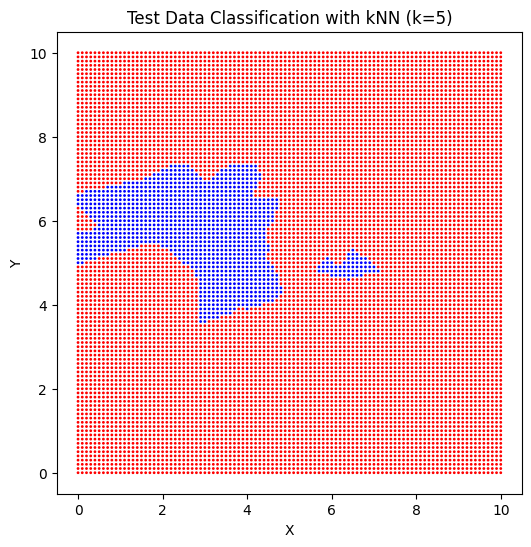

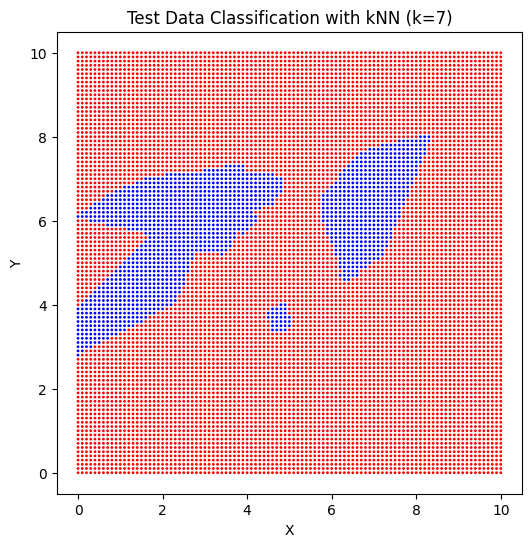

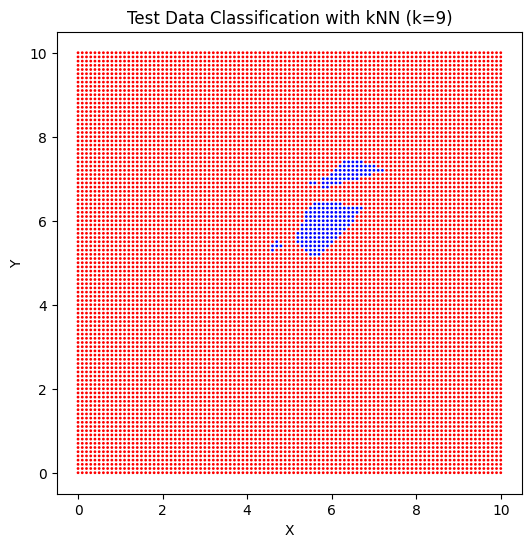

Columns in dataset: Index(['ast_0', 'ast_1', 'ast_2', 'ast_3', 'ast_4', 'ast_5', 'ast_6', 'ast_7',
       'ast_8', 'ast_9',
       ...
       'ast_760', 'ast_761', 'ast_762', 'ast_763', 'ast_764', 'ast_765',
       'ast_766', 'ast_767', 'Final_Marks', 'error_count'],
      dtype='object', length=770)
             ast_0        ast_1
count  1232.000000  1232.000000
mean      0.240722     0.065518
std       0.730630     0.852449
min      -2.673900    -3.134221
25%      -0.220102    -0.402736
50%       0.205123     0.259137
75%       0.710064     0.703087
max       2.297318     1.638042


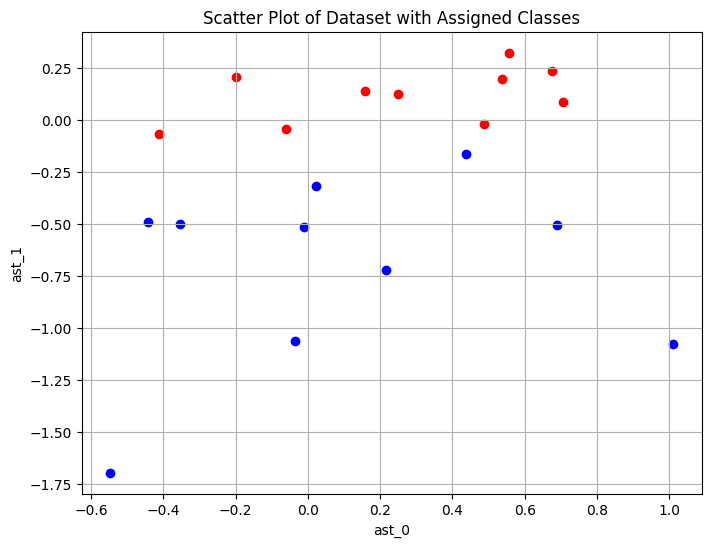

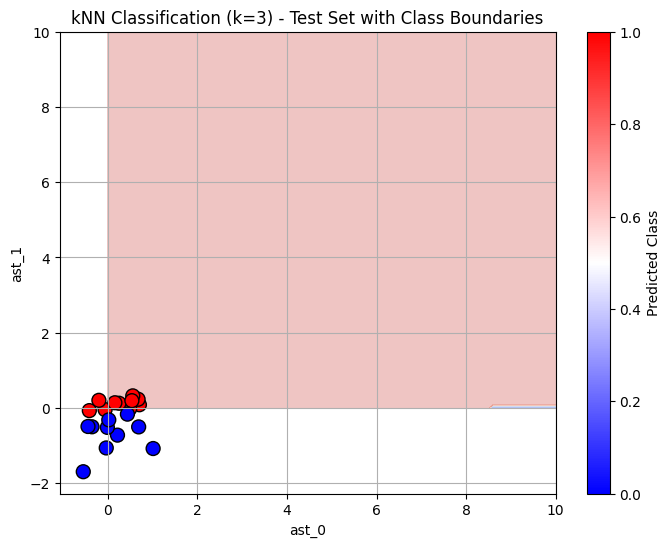

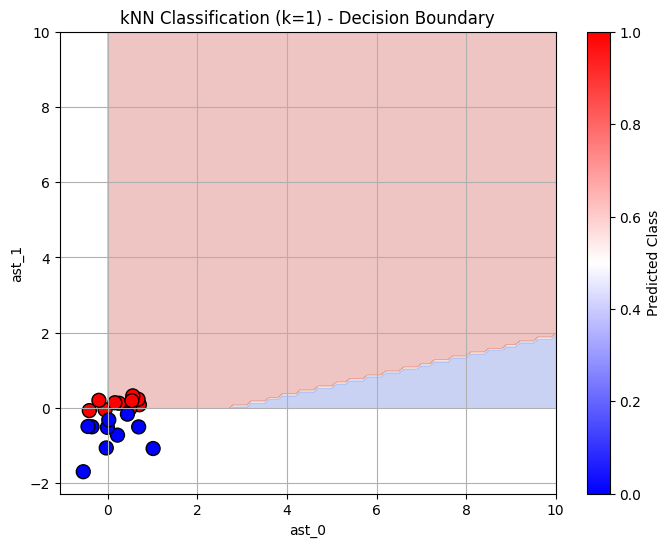

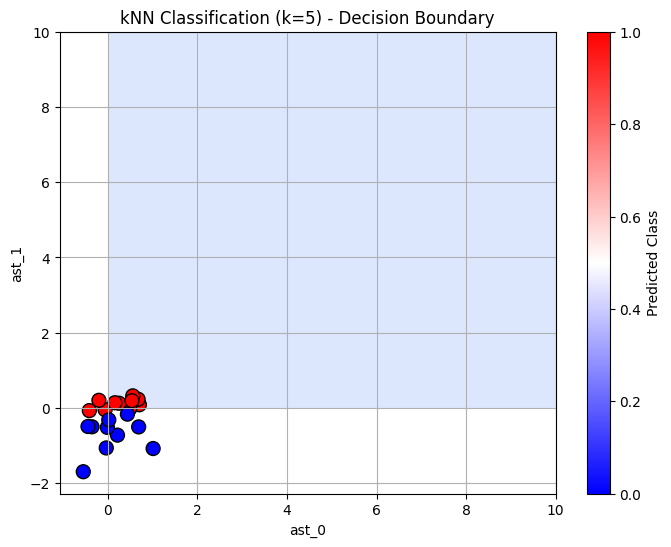

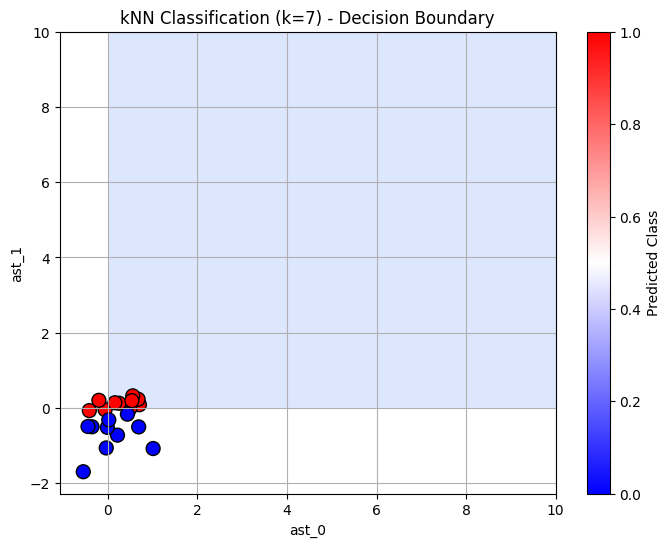

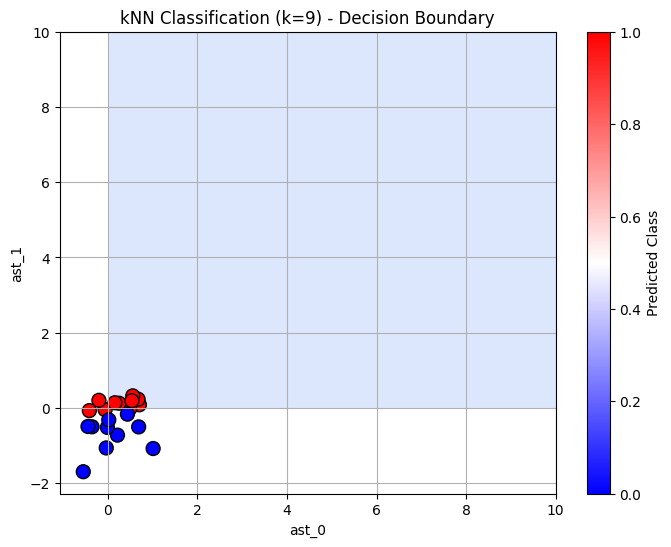

Best k value: 9


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# A1: Evaluation of confusion matrix (precision, recall, F1-score)
def evaluate_model_performance(y_true_train, y_pred_train, y_true_test, y_pred_test):
    """
    Evaluates model performance using a confusion matrix and calculates precision, recall, and F1-score
    for both training and test datasets.
    """
    def calculate_metrics(y_true, y_pred, dataset_type):
        cm = confusion_matrix(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='weighted')
        recall = recall_score(y_true, y_pred, average='weighted')
        f1 = f1_score(y_true, y_pred, average='weighted')

        print(f"\n{dataset_type} Data Evaluation:")
        print(f"Confusion Matrix:\n{cm}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1-Score: {f1:.2f}")
        return precision, recall, f1

    print("Model Performance Evaluation")
    calculate_metrics(y_true_train, y_pred_train, "Training")
    calculate_metrics(y_true_test, y_pred_test, "Test")

# Load dataset
dataset_path = "/content/10-Java_AST_in_.xlsx"
df = pd.read_excel(dataset_path)

# Assume the last column is the target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

evaluate_model_performance(y_train, y_pred_train, y_test, y_pred_test)

# A2: Regression Metrics
def evaluate_regression_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    print(f"MSE: {mse}, RMSE: {rmse}, MAPE: {mape}, R2: {r2}")

# Regression Data for A2
np.random.seed(42)
y_true = np.random.uniform(100, 500, 50)
y_pred = y_true + np.random.normal(0, 25, 50)
evaluate_regression_model(y_true, y_pred)

# A3: Generate Training Data
np.random.seed(42)
X_train = np.random.uniform(1, 10, 20)
Y_train = np.random.uniform(1, 10, 20)
labels = np.random.choice([0, 1], 20)

plt.figure(figsize=(6,6))
for i in range(20):
    plt.scatter(X_train[i], Y_train[i], color='blue' if labels[i] == 0 else 'red')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Training Data Scatter Plot")
plt.show()

# A4: Generate Test Data and Classify using kNN for k=3
X_test = np.arange(0, 10.1, 0.1)
Y_test = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(X_test, Y_test)
test_points = np.c_[X_test.ravel(), Y_test.ravel()]

train_data = np.c_[X_train, Y_train]
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_data, labels)
y_test_pred = knn.predict(test_points)

plt.figure(figsize=(6,6))
plt.scatter(test_points[:, 0], test_points[:, 1], c=['blue' if y == 0 else 'red' for y in y_test_pred], s=1)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Test Data Classification with kNN (k=3)")
plt.show()

# A5: Repeat Classification for various k values to observe boundary changes
k_values = [1, 5, 7, 9]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data, labels)
    y_test_pred = knn.predict(test_points)

    plt.figure(figsize=(6,6))
    plt.scatter(test_points[:, 0], test_points[:, 1], c=['blue' if y == 0 else 'red' for y in y_test_pred], s=1)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Test Data Classification with kNN (k={k})")
    plt.show()

#A6 (A3,A4,A5 combined)
# Define file path and sheet name
file_path = r"/content/10-Java_AST_in_.xlsx"
sheet_name = "in"

# Load dataset
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Print column names for debugging
print("Columns in dataset:", df.columns)

# Select two numerical features for classification
feature_x, feature_y = "ast_0", "ast_1"

# Debugging: Check dataset statistics
print(df[[feature_x, feature_y]].describe())

# Filter values in range [1,10] for both features
df_filtered = df[(df[feature_x] >= 1) & (df[feature_x] <= 10) &
                (df[feature_y] >= 1) & (df[feature_y] <= 10)]

# If no valid values, use the first 20 rows instead
if df_filtered.empty:
    print("Warning: No values in range [1,10]. Using first 20 rows instead.")
    df_filtered = df.head(20)

# Select 20 training points
df_train = df_filtered.sample(n=min(20, len(df_filtered)), random_state=42)

# Assign class labels (Class 0: Y < median(Y), Class 1: Y >= median(Y))
median_y = df_train[feature_y].median()
df_train["Class"] = df_train[feature_y].apply(lambda y: 1 if y >= median_y else 0)

# Prepare training data
X_train = df_train[[feature_x, feature_y]].values
y_train = df_train["Class"].values

# Scatter plot of training data
plt.figure(figsize=(8, 6))
for i in range(len(X_train)):
    color = 'red' if y_train[i] == 1 else 'blue'
    plt.scatter(X_train[i, 0], X_train[i, 1], color=color)

plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title("Scatter Plot of Dataset with Assigned Classes")
plt.grid(True)
plt.show()

# Generate test set (X, Y from 0 to 10 with 0.1 step)
x_test_values = np.arange(0, 10.1, 0.1)
y_test_values = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(x_test_values, y_test_values)
test_points = np.c_[X_test.ravel(), Y_test.ravel()]

# Train kNN classifier (k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict classes for test set
predicted_classes = knn.predict(test_points).reshape(X_test.shape)

# Plot kNN decision boundary for k=3
plt.figure(figsize=(8,6))
plt.contourf(X_test, Y_test, predicted_classes, cmap="coolwarm", alpha=0.3)
plt.scatter(df_train[feature_x], df_train[feature_y],
            c=df_train["Class"], cmap="bwr", edgecolors="black", s=100)
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title("kNN Classification (k=3) - Test Set with Class Boundaries")
plt.colorbar(label="Predicted Class")
plt.grid(True)
plt.show()

# Function to train kNN & visualize results
def plot_knn_decision_boundary(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    predicted_classes = knn.predict(test_points).reshape(X_test.shape)

    plt.figure(figsize=(8,6))
    plt.contourf(X_test, Y_test, predicted_classes, cmap="coolwarm", alpha=0.3)
    plt.scatter(df_train[feature_x], df_train[feature_y],
                c=df_train["Class"], cmap="bwr", edgecolors="black", s=100)
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.title(f"kNN Classification (k={k}) - Decision Boundary")
    plt.colorbar(label="Predicted Class")
    plt.grid(True)
    plt.show()

# Run for k=1, 5, 7, 9
for k in [1, 5, 7, 9]:
    plot_knn_decision_boundary(k)

# A7: Hyperparameter tuning with GridSearchCV
max_k = min(len(X_train) // 2, 20)  # Ensure k does not exceed half of training samples
param_grid = {'n_neighbors': list(range(1, max_k + 1, 2))}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=min(5, len(X_train)), scoring='accuracy', error_score='raise')
grid_search.fit(train_data, labels)
print(f"Best k value: {grid_search.best_params_['n_neighbors']}")
